# Twitter API

Sólo con cuenta de desarrollador API's que provee Twitter:

* Tweets : buscar, publicar, filtrar, transmitir, etc.
* Ads : análisis de audiencia
* DM : enviar y recibir, respuesta directa, mensajes de bienvenida, etc. (aún en prueba)
* Cuentas y usuarios : administración de cuentas e interacciones con usuarios
* Media : acceder y subir a la plataforma fotos, videos, gif's
* Trends : trending topics dada una localización
* Geo : información de lugares cerca de una localización

Librerías de Python para trabajar con la API de Twitter

* Tweepy (la más recomendada y utilizada)
* Python Twitter Tools
* Twython
* TwitterAPI
* TwitterSearch

## Recolección por medio de APIs

**API** (Aplication Programming Interface) es una biblioteca, un conjunto de funciones que ofrece una cierta aplicación para ser accesada por otra.

API Twiiter: tweepy Modo streaming

API REST (Representational State Transfer, transferencia de estado representacional) es un método sencillo para recibir y enviar datos en cualquier formato, XML, JSON. Para ello se utilizan funciones POST, GET, PUT, DELETE.

## RESTful API Cuenta de desarrollador de Twitter

Necesitamos:

Crear una APP en twitter, en la cual se generan las siguientes llaves: consumer key API-KEY consumer seceret key API-KEY Secret access token key access token secret key Instalar las librerías para trabajar con twitter desde python: tweepy

#conda install -c conda-forge tweepy

In [1]:
import os 
import pandas as pd
import tweepy as tw

In [2]:
#Crear un app, ir a Keys and Access Tokens (copiar)
#Click en "Create y accese Token Secret" (copiar)
#Credentials

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

#import json
#creds = ()
#creds["CONSUMER_KEY"] = ""
#creds["CONSUMER_SECRET"] = ""
#creds["ACCESS_TOKEN"] = ""
#creds["ACCESS_TOKN_SECRET"] = ""
#with open("twitter_creds.json", "w") as arch:
#   json.dump(creds, arch)

In [3]:
#se crea un objeto de la clase OAuthHandler para poder utilizar la API con python

auth = tw.OAuthHandler(consumer_key, consumer_secret) #objeto
auth.set_access_token(access_token, access_token_secret) #credenciales para utilizar la API, en
api = tw.API(auth, wait_on_rate_limit=True)

#objeto de la clase API, que nos permitirá realizar las consultas

In [4]:
#Ejemplo: dos variables de búsqueda
search_words = "#wildfires" #<- busqueda con este hashtag
date_since = "2018-11-16"

In [5]:
#Colecta los tweets según nuestras variables
#Buscamos search_words, los tweets en inglés, desde la fecha date_since, se restringe la busqueda
#Se utiliza el método Cursor para obtener los tweets que contengan la busqueda en este caso #wildfire
tweets = tw.Cursor(api.search, q = search_words, lang = "en", since = date_since).items(5)
#Cursor también devuelve información de quien escribe el tweet y la fecha además del texto del
tweets

In [6]:
#Despliega los tweets
for tweet in tweets:
    print(tweet.text)
#Otra manera

Firefighters in Arizona are battling over 20 #wildfires, sparked by hot &amp; dry conditions, resulting in multiple eva… https://t.co/Rz6xW07piF
RT @chriscartw83: As usual after NSIDC data, a look at the D+7 forecast 

Thank God, less warmth in the #arctic is next 

The best is yet t…
RT @chriscartw83: This is going to turn EPIC next week , with 20C over average 
Remember #Australia when similar conditions occurred

#NoWa…
Extreme heat and drought conditions heighten the risk of #wildfires. If you live in a wildfire-prone area, make sur… https://t.co/PAReXlAvdY
Good to know the vegetation on evacuation routes, so maybe other counties will follow suit. #EmergencyPlanning… https://t.co/gyuOfJ5LfS


In [7]:
#Eliminar los retweets
new_search=search_words + " -filter:retweets"
new_search

'#wildfires -filter:retweets'

In [8]:
tweets = tw.Cursor(api.search,q=new_search, lang="en",since=date_since).items(15)
[tweet.text for tweet in tweets]

['Firefighters in Arizona are battling over 20 #wildfires, sparked by hot &amp; dry conditions, resulting in multiple eva… https://t.co/Rz6xW07piF',
 'Extreme heat and drought conditions heighten the risk of #wildfires. If you live in a wildfire-prone area, make sur… https://t.co/PAReXlAvdY',
 'Good to know the vegetation on evacuation routes, so maybe other counties will follow suit. #EmergencyPlanning… https://t.co/gyuOfJ5LfS',
 'Large fire incident map is getting busier. A number of new human &amp; lightning caused #wildfires across the West. Nat… https://t.co/TLqmw7pJn6',
 '"PM 2.5:" the long-term enemy of our health.  https://t.co/c9xf746IW8 #wildfires #health #wildfiremitigation #CA… https://t.co/hyIvqbP5Wu',
 'Good piece on the incredibly underpaid, no-benefits service of seasonal #wildland #firefighters, whom we rely upon… https://t.co/wG6SZGq1wt',
 "The latest tool in fighting wildfires? Homes that won't burn. 🏠\n\n#Wildfires #WildfirePrevention #Fires… https://t.co/Ab6vdO5pxN

In [9]:
tweets = tw.Cursor(api.search,q=new_search, lang="en",since=date_since).items(15)
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['DefyDisaster', 'Los Angeles, CA'],
 ['IEMNews', 'HQ: Raleigh, NC '],
 ['bhaven', 'Northern California'],
 ['SeverePlains', 'Mayetta, KS'],
 ['SF_JordiO', 'Los Angeles, CA'],
 ['MayorDelMundo', 'Denver, CO'],
 ['CaraSantaMaria', 'Los Angeles'],
 ['buddhabookclub', 'Somerset, United Kingdom'],
 ['CSAC_Counties', 'Sacramento'],
 ['IQAir', 'Global'],
 ['StateForesterMS', 'Jackson, MS'],
 ['HySpeedGeo', ''],
 ['TMerfalen', ''],
 ['CCFirenIncident', 'SE Arizona'],
 ['PigeonExpress_', 'online']]

In [10]:
tweet_text = pd.DataFrame(data=users_locs, columns=['user', "location"])
tweet_text

,user,location
0,DefyDisaster,"Los Angeles, CA"
1,IEMNews,"HQ: Raleigh, NC"
2,bhaven,Northern California
3,SeverePlains,"Mayetta, KS"
4,SF_JordiO,"Los Angeles, CA"
5,MayorDelMundo,"Denver, CO"
6,CaraSantaMaria,Los Angeles
7,buddhabookclub,"Somerset, United Kingdom"
8,CSAC_Counties,Sacramento
9,IQAir,Global


In [11]:
# Nueva busqueda
new_search = "TecNM -filter:retweets"
tweets = tw.Cursor(api.search, q=new_search, lang="es", since="2020-01-01").items(10)
all_tweets = (tweet.text for tweet in tweets)
all_tweets

<generator object <genexpr> at 0x00000214D586D740>

In [12]:
tweets = tw.Cursor(api.search, q=new_search, lang="es",since="2020-01-01").items(10)
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_tecnm = pd.DataFrame(data=users_locs, columns=['user', 'location'])
tweet_tecnm

,user,location
0,sinreservas620,"Villahermosa, Tabasco, México"
1,vadenuezmzo,"Manzanillo, Colima"
2,_gaurs,2015
3,TecTlatlauqui,"Tlatlauquitepec, Puebla"
4,It_Zacatepec,
5,TecNM_Centla,
6,TecNMCintalapa,"Cintalapa, Chiapas"
7,TeschiOficial,"Chimalhuacán, México"
8,itmaoficial,"Milpa Alta, Distrito Federal"
9,TecNM_ITTLA,Av. Instituto Tecnológico s/n


In [35]:
#contando palabras
search_term = "#COVID -filter:retweets"
tweets = tw.Cursor(api.search, q=search_term, lang="en", since='2020-01-01').items(1000)
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['A great article discusses the interrelations between #Covid &amp; #sepsis. Since @WHO declared COVID a pandemic we’ve u… https://t.co/TmfWWCj1LS',
 'We want to make sure that the peace and quiet of a stay in our #LakeDistrict estate also gives you peace of mind. W… https://t.co/tpq3WVuh1T',
 'Tennessee’s GDP fell by 4.9% in 2020. The state went from having the 19th largest economy in the country in 2019 wi… https://t.co/KvfPekCnxE',
 'Coming up Today 3:45pmET  I’ll discuss #vaccine safety in kids &amp; why #covid breakthrough infections are normal @FoxNews @marthamaccallum',
 "Here we go again New Zealand....., yet another Trans-Tasman 'visitor' #covid"]

In [15]:
import re
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [16]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['COVID shrinks the mind A new study suggests that COVID19 might shrink parts of the brain Certain areas of th',
 'great colors facemask covid mask skincare staysafe coronavirus maskerwajah masks',
 'Please tell me your opinion Do you think the Olympics should be held in the midst of infection and discrimination',
 'Double check if the hotel you are visiting are safe enoughNotice if they are disinfected regularly',
 'drJoshS says summer could be a critical point in the COVID pandemic emphasizing the importance of continuing va']

In [17]:
all_tweets_no_urls[0].split()

['COVID',
 'shrinks',
 'the',
 'mind',
 'A',
 'new',
 'study',
 'suggests',
 'that',
 'COVID19',
 'might',
 'shrink',
 'parts',
 'of',
 'the',
 'brain',
 'Certain',
 'areas',
 'of',
 'th']

In [18]:
all_tweets_no_urls[0].lower().split()

['covid',
 'shrinks',
 'the',
 'mind',
 'a',
 'new',
 'study',
 'suggests',
 'that',
 'covid19',
 'might',
 'shrink',
 'parts',
 'of',
 'the',
 'brain',
 'certain',
 'areas',
 'of',
 'th']

In [19]:
#Creamos una lista de listas que contengan las palabras en minuscula para cada tweets
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['covid',
  'shrinks',
  'the',
  'mind',
  'a',
  'new',
  'study',
  'suggests',
  'that',
  'covid19',
  'might',
  'shrink',
  'parts',
  'of',
  'the',
  'brain',
  'certain',
  'areas',
  'of',
  'th'],
 ['great',
  'colors',
  'facemask',
  'covid',
  'mask',
  'skincare',
  'staysafe',
  'coronavirus',
  'maskerwajah',
  'masks']]

In [21]:
#Vemos la frecuencia de cada palabra
#conda install -c conda-forge itertools
#conda install -c conda-forge textblob
import itertools #crea objetos iterables, es rápido
import collections #crea colecciones como un dict especial sino existe la palabra agrega al dict
# Lista de todas las palabras en todos los tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))
# Cuenta las palabras
counts_no_urls = collections.Counter(all_words_no_urls)
#Selecciona las 15 más utilizadas
counts_no_urls.most_common(15) #método de collection.Counter

[('the', 580),
 ('covid', 492),
 ('to', 406),
 ('of', 331),
 ('in', 264),
 ('a', 258),
 ('and', 244),
 ('for', 180),
 ('covid19', 179),
 ('is', 172),
 ('are', 120),
 ('on', 109),
 ('you', 106),
 ('from', 86),
 ('that', 84)]

In [22]:
all_words_no_urls

['covid',
 'shrinks',
 'the',
 'mind',
 'a',
 'new',
 'study',
 'suggests',
 'that',
 'covid19',
 'might',
 'shrink',
 'parts',
 'of',
 'the',
 'brain',
 'certain',
 'areas',
 'of',
 'th',
 'great',
 'colors',
 'facemask',
 'covid',
 'mask',
 'skincare',
 'staysafe',
 'coronavirus',
 'maskerwajah',
 'masks',
 'please',
 'tell',
 'me',
 'your',
 'opinion',
 'do',
 'you',
 'think',
 'the',
 'olympics',
 'should',
 'be',
 'held',
 'in',
 'the',
 'midst',
 'of',
 'infection',
 'and',
 'discrimination',
 'double',
 'check',
 'if',
 'the',
 'hotel',
 'you',
 'are',
 'visiting',
 'are',
 'safe',
 'enoughnotice',
 'if',
 'they',
 'are',
 'disinfected',
 'regularly',
 'drjoshs',
 'says',
 'summer',
 'could',
 'be',
 'a',
 'critical',
 'point',
 'in',
 'the',
 'covid',
 'pandemic',
 'emphasizing',
 'the',
 'importance',
 'of',
 'continuing',
 'va',
 'north',
 'west',
 'covid',
 'increasing',
 'today',
 'lancashire',
 'northwest',
 'preston',
 'blackburn',
 'vaccine',
 'football',
 'england',
 'c

In [32]:
#utilizamos pandas
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15), columns=['words','count'])
clean_tweets_no_urls.head()

,words,count
0,the,580
1,covid,492
2,to,406
3,of,331
4,in,264


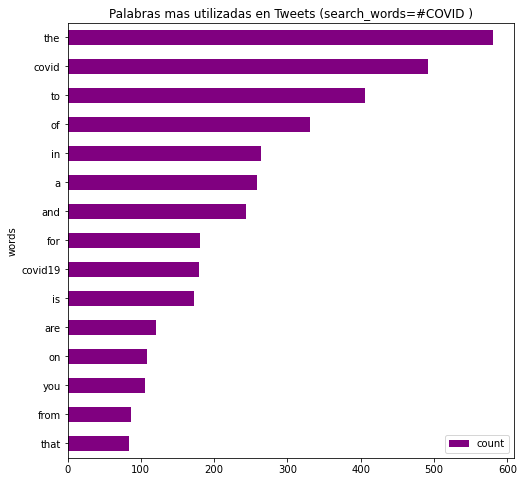

In [33]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(8,8))
#Grafica de barra horizontal
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="purple")
ax.set_title("Palabras mas utilizadas en Tweets (search_words=#COVID )")
plt.show()

# Sentiment Analysis

Se utiliza para identificar temas de interés. Se utiliza un rango de +1 a -1. Donde +1 es de mayor interés o de mayor positividad -1 es de menos interés o de mayor negatividad.

TextBlob se utilzia para calcular los valores de polaridad en tweets AI crear objetos TextBlob se puede identificar el valor de polaridad por medio del metodo polarity

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
#conda install -c conda-forge textblob
from textblob import TextBlob

In [37]:
#Cambio climatico
search_term = "#climatechange -filter:retweets"
tweets = tw.Cursor(api.search, q=search_term, lang="en", since='2020-01-01').items(1000)
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [38]:
#Analisis de sentimientos en los tweets
#Creamos objetos textblob
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0] #imprime el primero

(0.13636363636363635,
 TextBlob("Millions of Americans live in homes that need rehabbing an opportunity to improve energyefficiency amp are often i"))

In [39]:
# Creamos una lista de polaridad por cada tweet
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values

[[0.13636363636363635,
  'Millions of Americans live in homes that need rehabbing an opportunity to improve energyefficiency amp are often i'],
 [0.8,
  'UN official rejects Australias claim it was told Great Barrier Reef wouldnt be put forward for in danger list'],
 [0.0,
  'ENG This Thursday the event Energy Transition in Panama Compacts to improve climate ambition will be held und'],
 [0.21428571428571427,
  'Why Utilities Want to Control Your Smart Thermostat ScienceEnvironment climatechange PowerMove Science'],
 [0.11666666666666665,
  'Gabon is first African country paid to protect its rainforest Nearly 90 of Gabon is covered by forest which c'],
 [0.05,
  'Help us create a Climate Action Plan that not only lowers greenhouse gas emissions but also builds sustainable com'],
 [0.0,
  'TextileExchange LaRheaPepper joins Aiis lewisperkins on Lewis amp Friends to discuss preferred fibers how mater'],
 [-0.3125,
  'California is hitting record temperatures this summer What does this me

In [40]:
#Creamos un df con la polaridad y el tweet
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity","tweet"])
sentiment_df.head()

,polarity,tweet
0,0.136364,Millions of Americans live in homes that need ...
1,0.800000,UN official rejects Australias claim it was to...
2,0.000000,ENG This Thursday the event Energy Transition ...
3,0.214286,Why Utilities Want to Control Your Smart Therm...
4,0.116667,Gabon is first African country paid to protect...


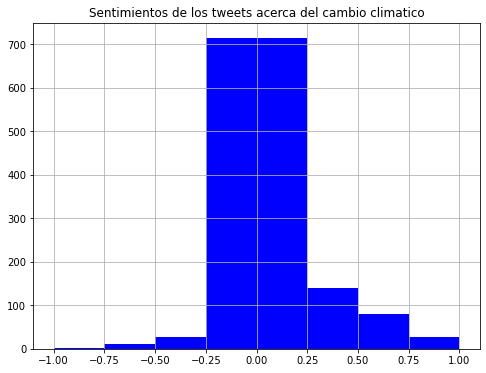

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax = ax, color="blue")
plt.title("Sentimientos de los tweets acerca del cambio climatico")
plt.show()

In [46]:
#Podemos eliminar aquellos con polaridad igual a cero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

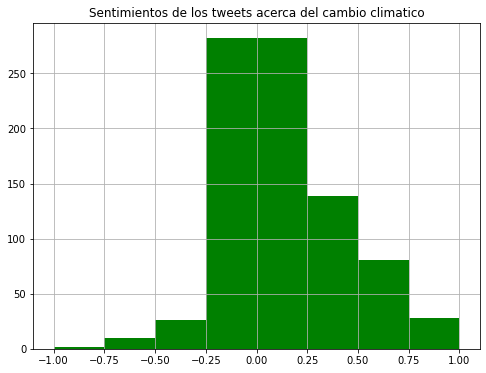

In [47]:
#Grafica sin tomar en cuenta polaridad = 0.0
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax = ax, color="green")
plt.title("Sentimientos de los tweets acerca del cambio climatico")
plt.show()

In [48]:
# twython
# conda install -c conda-forge twithon
from twython import Twython
import json #para leer mis credenciales
import pandas as pd

In [49]:
#No ejecutar esta parte si no se tiene el archivo JSON
with open("twitter_creds.json","r") as arch:
    c=json.load(arch)

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_creds.json'

In [ ]:
#No ejecutar esta otra parte si no se ejecuto la linea anterior
tuits = Twython(c["CONSUMER_KEY"], c["CONSUMER_SECRET"], c["ACCESS_TOKEN"],c["ACCESS_TOKEN_SECRET"])

In [50]:
tuits = Twython(consumer_key, consumer_secret, access_token,access_token_secret)

In [51]:
tuits.search(q="python", result_type="popular")
#https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

{'statuses': [{'created_at': 'Tue Jun 22 16:29:40 +0000 2021',
   'id': 1407375243295920130,
   'id_str': '1407375243295920130',
   'text': 'New blog post: "A from-scratch tour of Bitcoin in Python" https://t.co/1JskeC36Vm I\'ve tinkered with Bitcoin last ~… https://t.co/0tiaC7taL0',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/1JskeC36Vm',
      'expanded_url': 'https://karpathy.github.io/2021/06/21/blockchain/',
      'display_url': 'karpathy.github.io/2021/06/21/blo…',
      'indices': [58, 81]},
     {'url': 'https://t.co/0tiaC7taL0',
      'expanded_url': 'https://twitter.com/i/web/status/1407375243295920130',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [117, 140]}]},
   'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_

In [52]:
#Consultando
consulta = {"q":"bigdata","result_type":"popular","favorite_count":50,"lang":"en"}

In [53]:
info = tuits.search(**consulta)["statuses"]

In [54]:
type(info)

list

In [55]:
info

[{'created_at': 'Sun Jun 20 22:33:11 +0000 2021',
  'id': 1406741949521051649,
  'id_str': '1406741949521051649',
  'text': 'Get ggplot code for 7 types of Data Visualizations in R: https://t.co/EWH7veyaNH\n——————\n#abdsc #Rstats #Coding… https://t.co/H8FroltGtg',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'abdsc', 'indices': [88, 94]},
    {'text': 'Rstats', 'indices': [95, 102]},
    {'text': 'Coding', 'indices': [103, 110]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/EWH7veyaNH',
     'expanded_url': 'http://dy.si/usRMWA',
     'display_url': 'dy.si/usRMWA',
     'indices': [57, 80]},
    {'url': 'https://t.co/H8FroltGtg',
     'expanded_url': 'https://twitter.com/i/web/status/1406741949521051649',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [112, 135]}]},
  'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPho

In [56]:
d= {"user":[], "date":[], "text":[], "favorite_count":[]}
for e in tuits.search(**consulta)["statuses"]:
    d["user"].append(e["user"]["screen_name"])
    d["date"].append(e["created_at"])
    d["text"].append(e["text"])
    d["favorite_count"].append(e["favorite_count"])
    
pandita = pd.DataFrame(d)
pandita.sort_values(by="favorite_count", inplace=True,ascending=False)

In [57]:
pandita

,user,date,text,favorite_count
4,Omkar_Raii,Wed Jun 16 06:43:23 +0000 2021,"Adoption of emerging technologies such as #AI,...",160
3,Omkar_Raii,Fri Jun 18 09:01:16 +0000 2021,Rise in govt initiative to promote healthcare ...,148
0,KirkDBorne,Sun Jun 20 22:33:11 +0000 2021,Get ggplot code for 7 types of Data Visualizat...,76
2,KirkDBorne,Sun Jun 20 22:28:41 +0000 2021,Short *online* eBook [open access] — #MachineL...,47
5,SpirosMargaris,Sat Jun 19 00:29:03 +0000 2021,Artificial intelligence: \n\nCan #ethics keep ...,44
6,SpirosMargaris,Wed Jun 16 13:48:03 +0000 2021,Expect an #Orwellian future \n\nif #AI isn't k...,36
1,KirkDBorne,Sun Jun 20 22:35:53 +0000 2021,"Data, Analytics and Decision-making — A #Neuro...",22
